In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### Load ECG data

In [ ]:
# Download the dataset through web scrapping technique
## const request=require("request");
##const cheerio=require("cheerio");
#console.log("before");
#request("'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'",cb);
#console.log("after");



#function cb (error, response, html) {
 #   if(error){
 # console.error('error:', error); // Print the error if one occurred
  #  }else{
   #     handlehtml(html);

   # }
 
#}
#function handlehtml(html){
 #  let selecttool=cheerio.load(html);
  #  let array=selecttool("#ds-px-4 ds-py-2 ds-self-stretch ds-w-full");
   # for(let i=0;i<array.length;i++){
      # let result=selecttool(array[i]).text();
     #   console.log(result);
    #}
    
#}
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
## Last tagging data
labels = raw_data[:, -1]

## remaining datapoints of ecg of 140 data points
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normalizing the data


In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)


train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32) ## float 32 for better network training
test_data = tf.cast(test_data, tf.float32)


We  train the autoencoder using only the normal rhythms.Separate the normal rhythms from the abnormal rhythms.

In [ ]:
## Kadanes Algorithm
## def maxSubArraySum(dataframe,dataframe.length):
    
    #max_till_now = arr[0]
    #max_ending = 0
    
    #for i in range(0, size):
       ## train_labels = max_ending + arr[i]
        ##if max_ending < 0:
          ##  max_ending = 0
        
        
        #elif (max_till_now < max_ending):
            #test_labels= max_ending
            
    ##return train_data,test_data
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plot a normal ECG. 

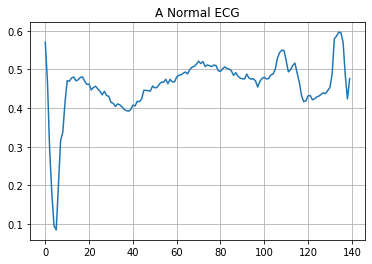

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plot an anomalous ECG.

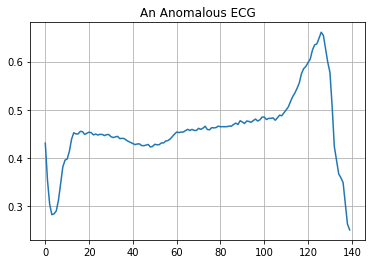

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### Build the model

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae') ## mean average error

In [ ]:
# sieve eratosthenes logic
# import math

#
#

##
#for i in range(2,autoencoder.list()+1):
 #   history.append(i)

#i = 2
#from 2 to sqrt(autoencoder.list())
#while(i <= int(math.sqrt(autoencoder.Max_train()))):
    
    #if i in history:
       # for j in range(i*2, autoencoder.list()+1, i):
        #    if j in history:
                
         #       history.remove(j)
    #i = i+1

history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 4s 55ms/step - loss: 0.0583 - val_loss: 0.0537
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0569 - val_loss: 0.0527
Epoch 3/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0557 - val_loss: 0.0515
Epoch 4/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0539 - val_loss: 0.0500
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0515 - val_loss: 0.0480
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0480 - val_loss: 0.0462
Epoch 7/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0441 - val_loss: 0.0449
Epoch 8/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0406 - val_loss: 0.0427
Epoch 9/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0373 - val_loss: 0.0410
Epoch 10/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0341 - val_loss: 0.0396
Epoch 11/20
5/5 [============

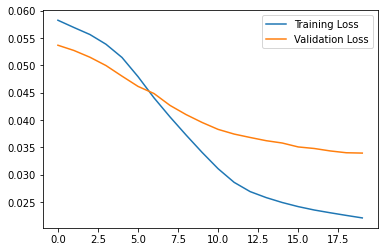

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")## validation is systemic error ecg
plt.legend()

### Detect anomalies through Statistical point of view

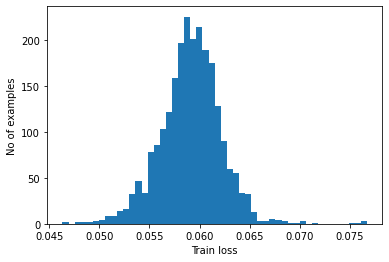

In [ ]:
# Good ecg
# def find_majority_elt(reconstructions):
   
   # majority_candidate = -1
   # trial = 0
    #for elt in reconstructions:
     #   if trial == 0:
     #       majority_candidate = elt
      #      trial = 1
       # else:
        #    if(elt == majority_candidate):
         #       trial += 1
          #  else:
           #     trial -= 1
    #return majority_candidate


#def is_majority(candidate, reconstructions):
 
 #   n = len(reconstructions)
  #  if n == 0:
   #     return False
   # count = 0
    #for elt in reconstructions:
     #   if elt == candidate:
      #      count += 1
    #return count > n // 2

reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.033889577


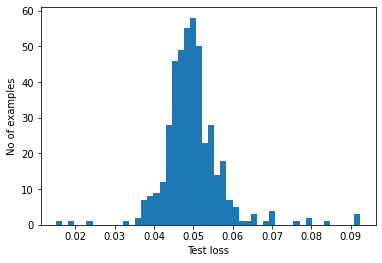

In [ ]:
#Anomalous ecg
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

### Result of error rectification

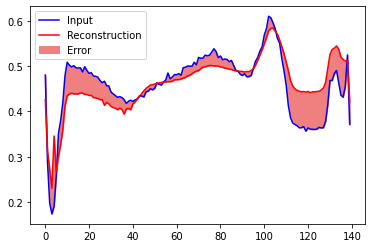

In [ ]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

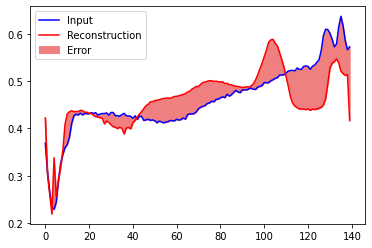

In [ ]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Accuracy measurement

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.944
Precision = 0.9921875
Recall = 0.9071428571428571
